In [64]:
%pylab inline
from scipy.stats.stats import pearsonr  

Populating the interactive namespace from numpy and matplotlib


/home/davide/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist', 'entropy', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#I=load("SparsityStudy1/InitialConfigurations1.npy")
#F=load("SparsityStudy1/FinalConfigurations1.npy")
grid=np.load("SparsityStudy1/grid.npy")
sparsities=np.load("SparsityStudy1/Sparsity.npy")

# Number of stable points and mean traveled distance

In [27]:
def CenterOfMass(V,grid):
    c=np.zeros(2)
    for i in range(len(V)):
        c[0]=c[0]+V[i]*grid[i][0]
        c[1]=c[1]+V[i]*grid[i][1]
    c[0]=c[0]/len(V)
    c[1]=c[1]/len(V)
    return c

def Tdistance(r_i,r_r):
    periodicity=1/2
    if np.abs(r_i[0]-r_r[0])<periodicity:
        dx=np.abs(r_i[0]-r_r[0])
    else:
        dx=1-np.abs(r_i[0]-r_r[0])
    if np.abs(r_i[1]-r_r[1])<periodicity:
        dy=np.abs(r_i[1]-r_r[1])
    else:
        dy=1-np.abs(r_i[1]-r_r[1])
    d=np.sqrt(pow(dx,2)+pow(dy,2))
    return d

In [75]:
simname="SparsityStudy3"
grid=np.load(simname+"/grid.npy")
sparsities=np.load(simname+"/Sparsity.npy")

meandistance3=np.zeros(len(sparsities))
stddistance3=np.zeros(len(sparsities))
meanMI3=np.zeros(len(sparsities))

for i in range(len(sparsities)):
    I=load(simname+"/InitialConfigurations"+str(i+1)+".npy")
    F=load(simname+"/FinalConfigurations"+str(i+1)+".npy")
    dist=[]
    mi=[]
    for j in range(len(I)):
        for k in range(len(I[j])):
            for t in range(len(I[j][j])):
                cin=CenterOfMass(I[j][k][t],grid)
                cout=CenterOfMass(F[j][k][t],grid)
                d=Tdistance(cin,cout)
                dist.append(d)
                mi.append(pearsonr(I[j][k][t],F[j][k][t]))
    
    meandistance3[i]=np.mean(dist)
    stddistance3[i]=np.std(dist)
    meanMI3[i]=mean(mi)
    print("Done "+str(i+1)+"/"+str(len(sparsities)))

Done 1/12
Done 2/12
Done 3/12
Done 4/12
Done 5/12
Done 6/12
Done 7/12
Done 8/12
Done 9/12
Done 10/12
Done 11/12
Done 12/12


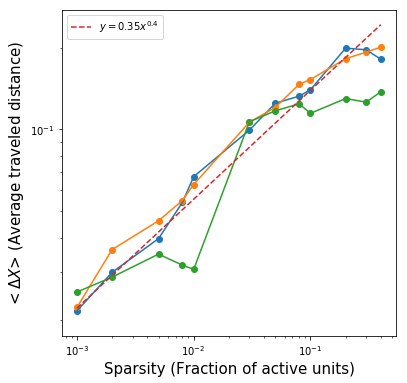

In [76]:
figure(figsize=(6,6))
plot(sparsities,meandistance1)
scatter(sparsities,meandistance1)
plot(sparsities,meandistance2)
scatter(sparsities,meandistance2)
plot(sparsities,meandistance3)
scatter(sparsities,meandistance3)
plot(sparsities,0.35*pow(sparsities,0.4),linestyle="--",label="$y=0.35 x^{0.4} $")
#errorbar(sparsities,meandistance,yerr=stddistance) 
xscale("log")
yscale("log")
xlabel("Sparsity (Fraction of active units)",fontsize=15)
ylabel("$<\Delta X$> (Average traveled distance)",fontsize=15)
legend()

Text(0,0.5,'$<C$> (Average correlation)')

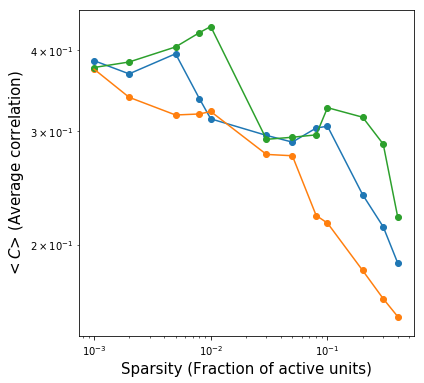

In [77]:
figure(figsize=(6,6))
plot(sparsities,meanMI1)
scatter(sparsities,meanMI1)
plot(sparsities,meanMI2)
scatter(sparsities,meanMI2)
plot(sparsities,meanMI3)
scatter(sparsities,meanMI3)
#plot(sparsities,0.35*pow(sparsities,0.4),linestyle="--",label="$y=0.35 x^{0.4} $")
#errorbar(sparsities,meandistance,yerr=stddistance) 
xscale("log")
yscale("log")
xlabel("Sparsity (Fraction of active units)",fontsize=15)
ylabel("$<C$> (Average correlation)",fontsize=15)
#legend()

In [63]:
meanMI

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [11]:
I=load("SparsityStudy1/InitialConfigurations6.npy")
F=load("SparsityStudy1/FinalConfigurations6.npy")

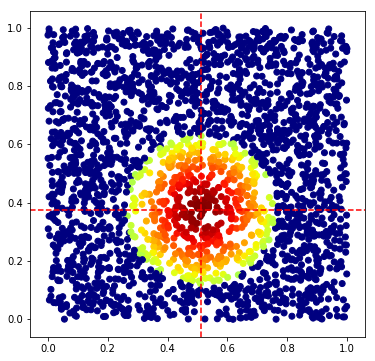

In [12]:
figure(figsize=(6,6))
scatter(grid.T[0],grid.T[1],c=F[3][3][0],cmap=cm.jet)
c=CenterOfMass(F[3][3][0],grid)
axvline(x=c[0],linestyle="--",c="r")
axhline(y=c[1],linestyle="--",c="r")